In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('happiness_score_dataset.csv')
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
type(data)

pandas.core.frame.DataFrame

In [16]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [7]:
dt=data.drop('Happiness Rank',axis=1)

In [8]:
dt.isnull().sum()

Country                          0
Region                           0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [15]:
#Fomrat setting

sns.set_style('whitegrid')
plt.font_size = 16
plt.figure.facecolor = '#FFE5B4'

## Small Analysis which can be done in future

In [18]:
health_grouping=dt.groupby('Region')['Health (Life Expectancy)'].sum()
health_grouping

Region
Australia and New Zealand           1.83993
Central and Eastern Europe         20.84444
Eastern Asia                        5.26433
Latin America and Caribbean        15.48515
Middle East and Northern Africa    14.11231
North America                       1.76742
Southeastern Asia                   6.09621
Southern Asia                       3.78581
Sub-Saharan Africa                 11.29327
Western Europe                     19.09211
Name: Health (Life Expectancy), dtype: float64

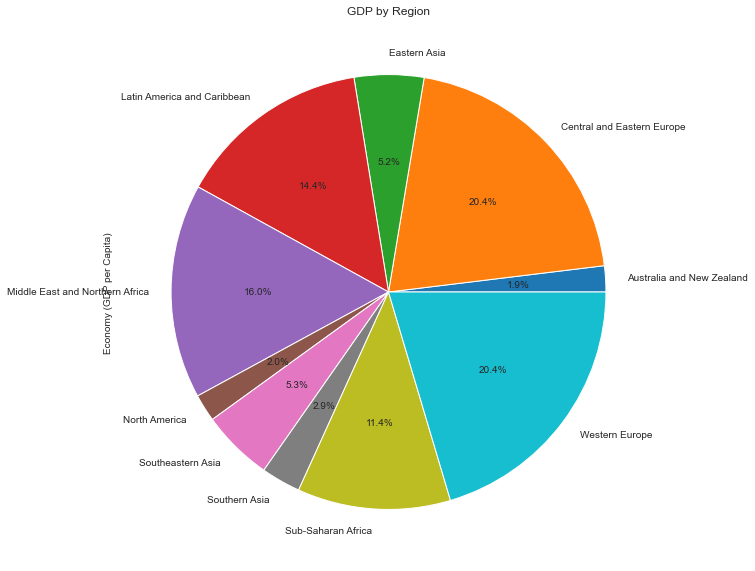

In [21]:
gdp_grouping=dt.groupby('Region')['Economy (GDP per Capita)'].sum()

plt.figure(figsize=(10,10))
gdp_grouping.plot.pie(autopct='%1.1f%%')
plt.title('GDP by Region')
plt.show()

In [22]:
dt=data.drop(['Region','Country','Happiness Rank'],axis=1)
dt.head(5)

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### Visualisation

In [23]:
dt.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


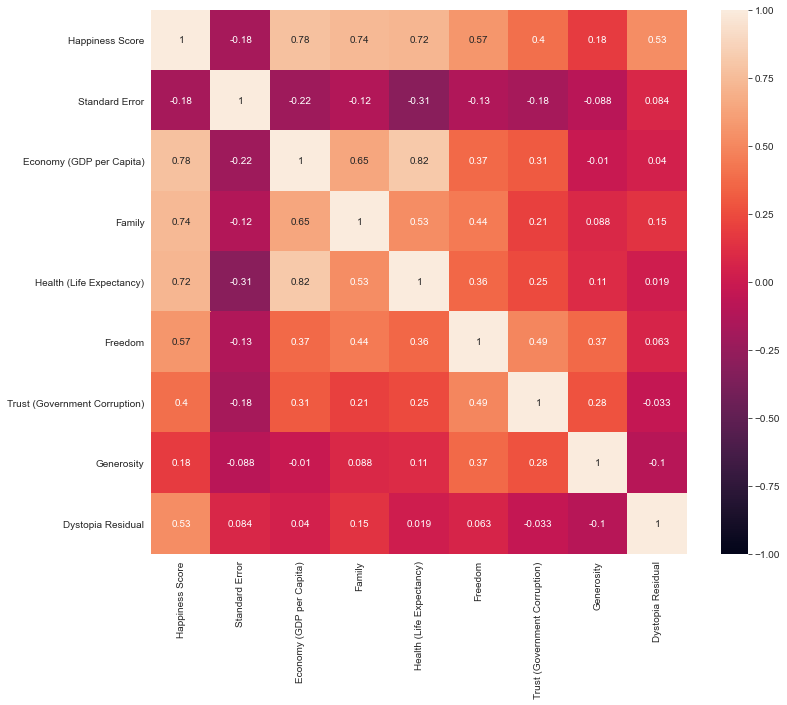

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(dt.corr(),annot=True,vmin=-1.0,vmax=1.0)
plt.show()

Happiness Score                     AxesSubplot(0.125,0.657941;0.227941x0.222059)
Standard Error                   AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Economy (GDP per Capita)         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Family                              AxesSubplot(0.125,0.391471;0.227941x0.222059)
Health (Life Expectancy)         AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Freedom                          AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Trust (Government Corruption)          AxesSubplot(0.125,0.125;0.227941x0.222059)
Generosity                          AxesSubplot(0.398529,0.125;0.227941x0.222059)
Dystopia Residual                   AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

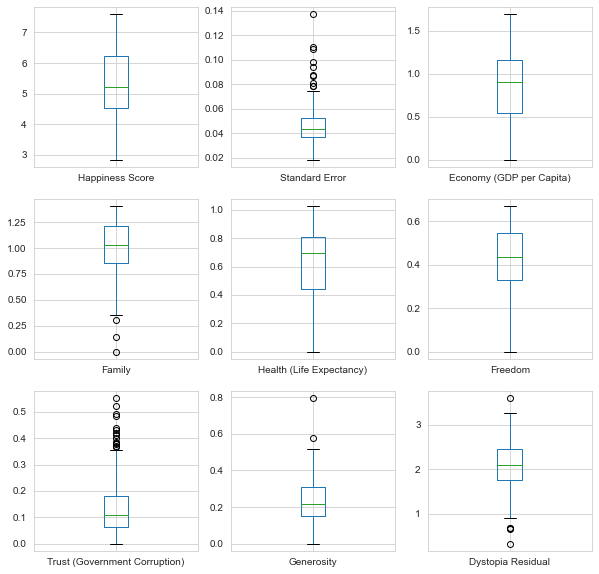

In [27]:
#lets check for the outliers
dt.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,10))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

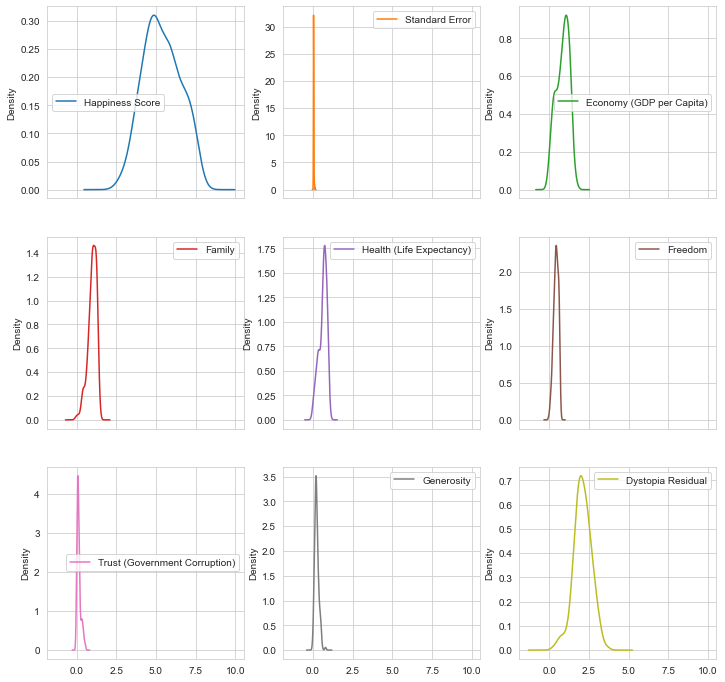

In [28]:
dt.plot(kind='kde',subplots=True,layout=(3,3),figsize=(12,12))

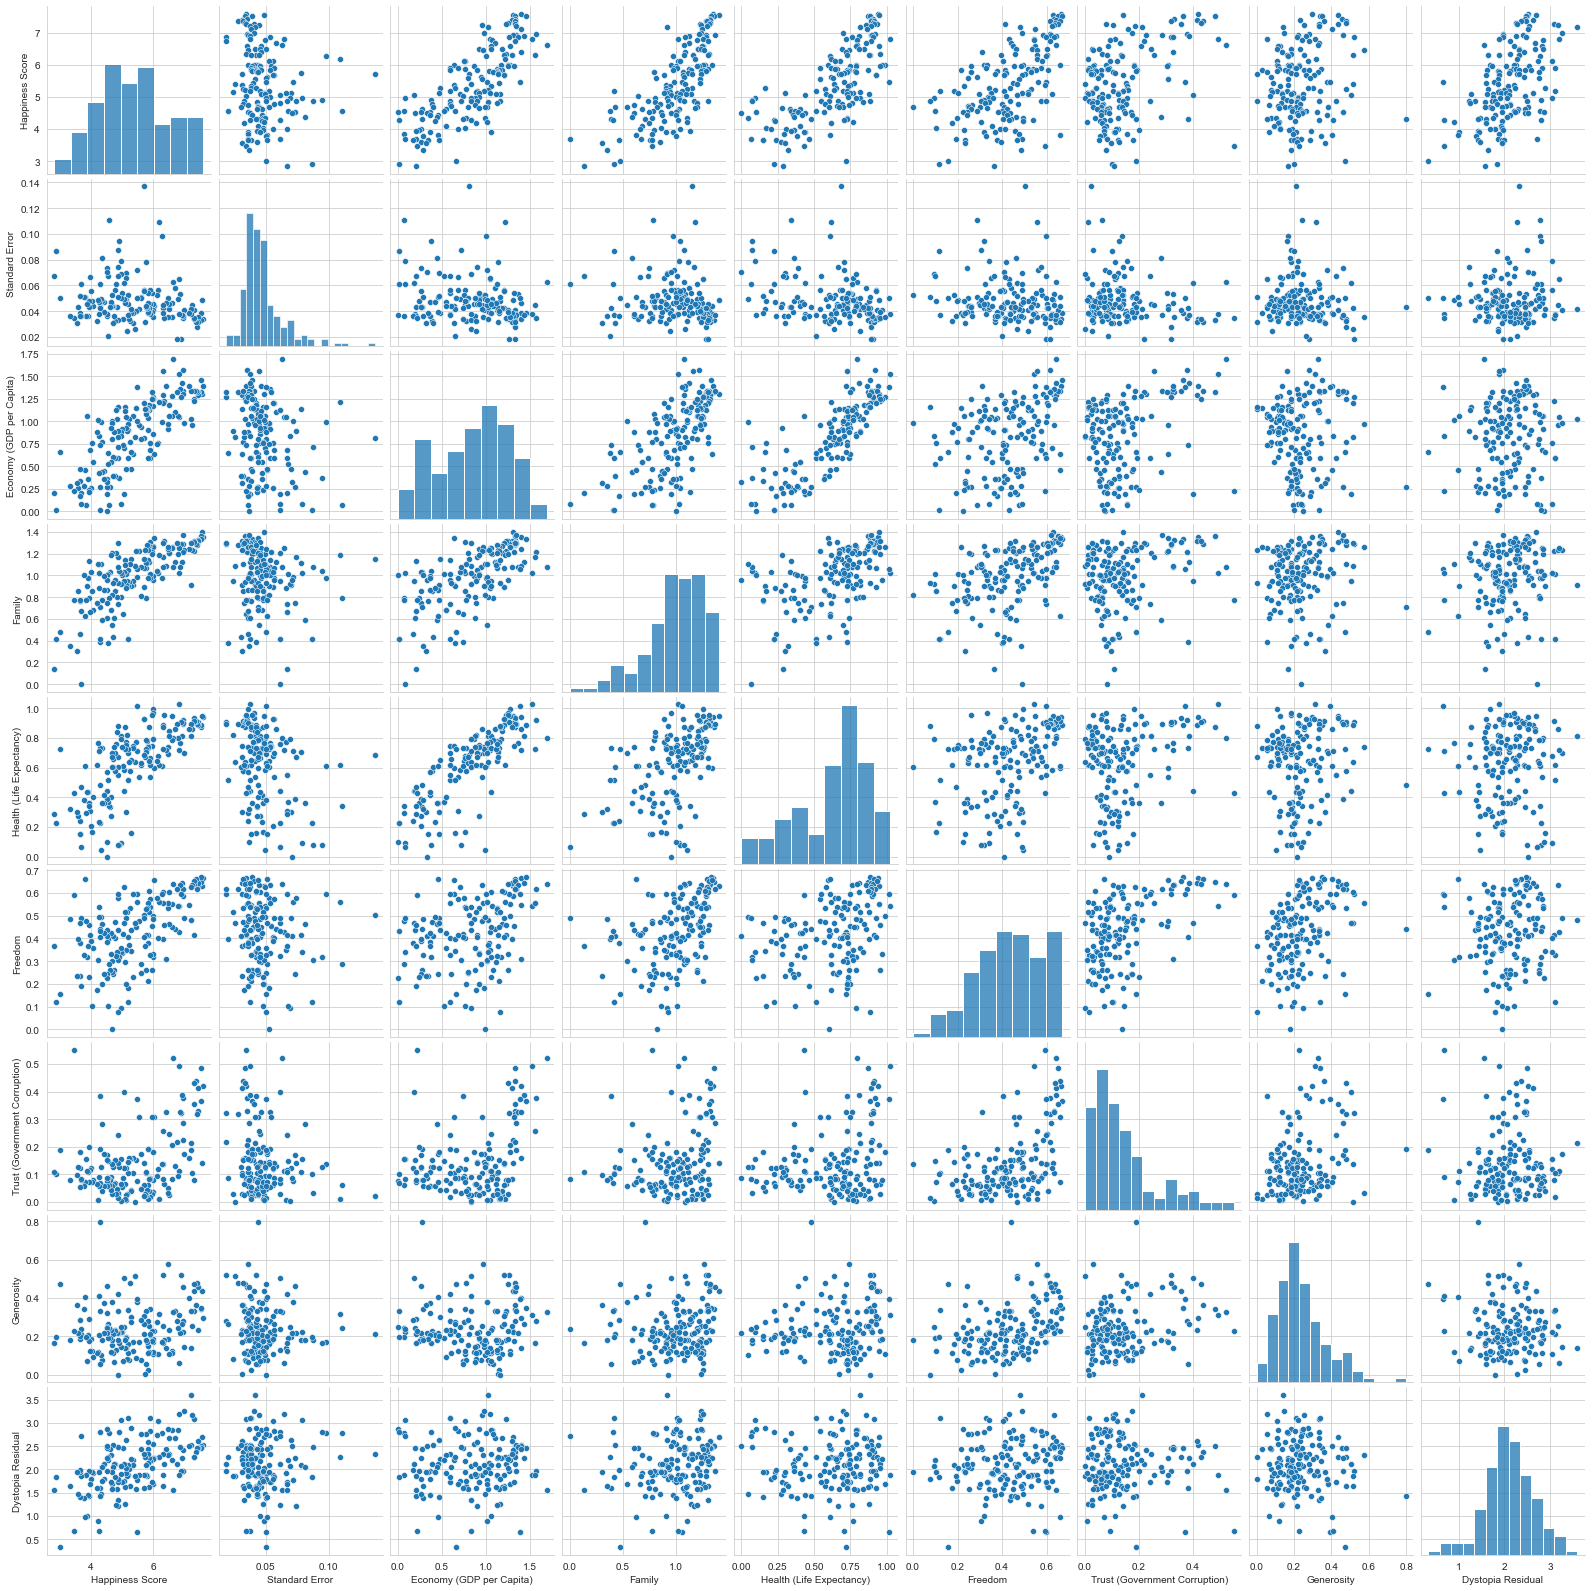

In [43]:
sns.pairplot(dt)

## Preprocessing

In [34]:
from scipy.stats import zscore
z=np.abs(zscore(dt))

In [35]:
threshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([6, 1, 1, 1, 7, 3, 6, 8, 3], dtype=int64))


In [36]:
z[27][6]

3.1646194851713774

In [38]:
filt_dt=dt[(z<3).all(axis=1)]

In [41]:
print(dt.shape,filt_dt.shape)

(158, 9) (149, 9)


### Modelling

In [45]:
Y=filt_dt['Happiness Score']
X=filt_dt.drop('Happiness Score',axis=1)

In [48]:
X

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [49]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.25,random_state=42)

In [51]:
x_train.shape

(111, 8)

In [53]:
x_test.shape

(38, 8)

In [54]:
y_train.shape

(111,)

In [55]:
y_test.shape

(38,)

In [58]:
ln=LinearRegression()
ln.fit(x_train,y_train)
ln.coef_


array([-6.33501609e-04,  1.00015382e+00,  9.99922933e-01,  9.99788293e-01,
        9.99677870e-01,  9.99930328e-01,  1.00005256e+00,  9.99993804e-01])

In [59]:
ln.score(x_train,y_train)

0.9999999367269394

In [66]:
y_pred=ln.predict(x_test)
print('Predicted Result:',y_pred)
print('Actual Result:',y_test)

Predicted Result: [5.28632784 6.93731889 4.5122894  5.19230132 5.21197621 6.47673032
 5.6046299  3.7808399  5.47382062 5.12418611 4.64234177 7.1997877
 6.29814776 7.28396206 6.90133092 5.8125167  3.90378863 5.42857955
 5.82410016 4.03308746 6.50504761 4.33216131 6.66964163 4.25202995
 4.21852581 3.65513246 4.63349161 4.78792841 5.97519775 6.48508251
 6.8101643  6.98252646 5.58862665 7.22564013 5.99508481 4.69399304
 5.85521053 6.57502479]
Actual Result: 76     5.286
18     6.937
121    4.512
81     5.192
79     5.212
32     6.477
67     5.605
145    3.781
71     5.474
85     5.124
112    4.642
12     7.200
37     6.298
9      7.284
19     6.901
58     5.813
141    3.904
72     5.429
57     5.824
136    4.033
30     6.505
127    4.332
26     6.670
132    4.252
133    4.218
150    3.655
113    4.633
104    4.788
47     5.975
31     6.485
22     6.810
15     6.983
68     5.589
11     7.226
44     5.995
108    4.694
53     5.855
28     6.575
Name: Happiness Score, dtype: float64


In [60]:
#R2 Score
ln.score(x_test,y_test)

0.9999999359577566

In [69]:
print(f'Mean Absolute Error: {round(mean_absolute_error(y_test,y_pred),4)}')
print(f'Mean Square Error:{round(mean_squared_error(y_test,y_pred),4)}')

Mean Absolute Error: 0.0002
Mean Square Error:0.0
